In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

from logreg import LogRegCCD, generate_dataset

In [ ]:
## test parameter n

In [2]:
p = 0.5
g = 0.5
d = 50
ns = [50, 100, 200, 300, 500, 1000]
N = len(ns)

n_repeats = 5

lr_rocs = []
lr_bas = []
ccd_rocs = []
ccd_bas = []

lr_rocs_std = []
lr_bas_std = []
ccd_rocs_std = []
ccd_bas_std = []

for i, n in enumerate(ns):
    print(f"{i+1}/{N}: n = {n}")

    lr_roc_vals = []
    lr_ba_vals = []
    ccd_roc_vals = []
    ccd_ba_vals = []

    for _ in range(n_repeats):
        X, y = generate_dataset(n=n, p=p, g=g, d=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

        lr = LogisticRegression(penalty=None, random_state=23)
        lgccd = LogRegCCD(lambda_min=1e-3)
        _, best_lambda = lgccd.optimize_lambda(X_train, y_train, X_test, y_test, measure="f1", verbose=1)

        lr.fit(X_train, y_train)
        lr_y_probs = lr.predict_proba(X_test)[:,1]
        lr_preds = (lr_y_probs >= 0.5).astype(int)

        lr_roc_vals.append(roc_auc_score(y_test, lr_y_probs))
        lr_ba_vals.append(balanced_accuracy_score(y_test, lr_preds))

        lgccd.fit(X_train, y_train, best_lambda)
        ccd_roc_vals.append(lgccd.validate(X_test, y_test, measure='roc_auc'))
        ccd_ba_vals.append(lgccd.validate(X_test, y_test, measure='balanced_accuracy'))

    lr_rocs.append(np.mean(lr_roc_vals))
    lr_bas.append(np.mean(lr_ba_vals))
    ccd_rocs.append(np.mean(ccd_roc_vals))
    ccd_bas.append(np.mean(ccd_ba_vals))

    lr_rocs_std.append(np.std(lr_roc_vals))
    lr_bas_std.append(np.std(lr_ba_vals))
    ccd_rocs_std.append(np.std(ccd_roc_vals))
    ccd_bas_std.append(np.std(ccd_ba_vals))

1/6: n = 50


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


2/6: n = 100


100%|██████████| 100/100 [00:13<00:00,  7.22it/s]


3/6: n = 200


100%|██████████| 100/100 [00:15<00:00,  6.64it/s]


4/6: n = 300


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


5/6: n = 500


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


6/6: n = 1000


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


In [3]:
data = {
    'n': ns,
    'lr_rocauc': lr_rocs,
    'lr_rocauc_std': lr_rocs_std,
    'lr_balancedaccuracy': lr_bas,
    'lr_balancedaccuracy_std': lr_bas_std,
    'ccd_rocauc': ccd_rocs,
    'ccd_rocauc_std': ccd_rocs_std,
    'ccd_balancedaccuracy': ccd_bas,
    'ccd_balancedaccuracy_std': ccd_bas_std
}

df = pd.DataFrame(data)
df.set_index('n', inplace=True)
print(df)

      lr_rocauc  lr_rocauc_std  lr_balancedaccuracy  lr_balancedaccuracy_std  \
n                                                                              
50     0.649423       0.085071             0.619762                 0.069919   
100    0.653189       0.097341             0.615669                 0.075124   
200    0.639502       0.043096             0.587243                 0.060589   
300    0.677850       0.049548             0.617543                 0.048212   
500    0.724463       0.028444             0.662024                 0.014399   
1000   0.723471       0.031946             0.672101                 0.030770   

      ccd_rocauc  ccd_rocauc_std  ccd_balancedaccuracy  \
n                                                        
50      0.721349        0.124863              0.671667   
100     0.746506        0.047894              0.659622   
200     0.745642        0.024745              0.685599   
300     0.749817        0.071534              0.690571   
500     0.7

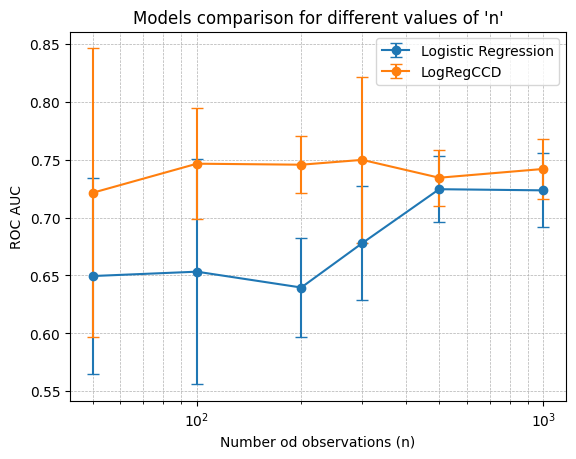

In [ ]:
plt.errorbar(ns, lr_rocs, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ns, ccd_rocs, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)

plt.xlabel("Number od observations (n)")
plt.ylabel("ROC AUC")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'n'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

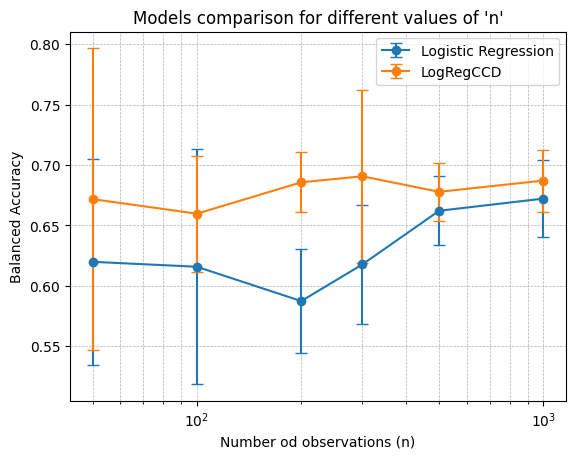

In [5]:
plt.errorbar(ns, lr_bas, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ns, ccd_bas, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)
plt.xlabel("Number od observations (n)")
plt.ylabel("Balanced Accuracy")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'n'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
## parameter d

In [ ]:
p = 0.5
g = 0.5
n = 500
ds = [5, 10, 20, 50, 100, 250]
N = len(ds)

n_repeats = 5

lr_rocs = []
lr_bas = []
ccd_rocs = []
ccd_bas = []

lr_rocs_std = []
lr_bas_std = []
ccd_rocs_std = []
ccd_bas_std = []

for i, d in enumerate(ds):
    print(f"{i+1}/{N}: d = {d}")

    lr_roc_vals = []
    lr_ba_vals = []
    ccd_roc_vals = []
    ccd_ba_vals = []

    for _ in range(n_repeats):
        X, y = generate_dataset(n=n, p=p, g=g, d=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

        lr = LogisticRegression(penalty=None, random_state=23)
        lgccd = LogRegCCD(lambda_min=1e-3)
        _, best_lambda = lgccd.optimize_lambda(X_train, y_train, X_test, y_test, measure="f1", verbose=1)

        lr.fit(X_train, y_train)
        lr_y_probs = lr.predict_proba(X_test)[:,1]
        lr_preds = (lr_y_probs >= 0.5).astype(int)

        lr_roc_vals.append(roc_auc_score(y_test, lr_y_probs))
        lr_ba_vals.append(balanced_accuracy_score(y_test, lr_preds))

        lgccd.fit(X_train, y_train, best_lambda)
        ccd_roc_vals.append(lgccd.validate(X_test, y_test, measure='roc_auc'))
        ccd_ba_vals.append(lgccd.validate(X_test, y_test, measure='balanced_accuracy'))

    lr_rocs.append(np.mean(lr_roc_vals))
    lr_bas.append(np.mean(lr_ba_vals))
    ccd_rocs.append(np.mean(ccd_roc_vals))
    ccd_bas.append(np.mean(ccd_ba_vals))

    lr_rocs_std.append(np.std(lr_roc_vals))
    lr_bas_std.append(np.std(lr_ba_vals))
    ccd_rocs_std.append(np.std(ccd_roc_vals))
    ccd_bas_std.append(np.std(ccd_ba_vals))

1/7: d = 5


100%|██████████| 100/100 [00:00<00:00, 101.72it/s]


2/7: d = 10


100%|██████████| 100/100 [00:01<00:00, 51.23it/s]


3/7: d = 20


100%|██████████| 100/100 [00:03<00:00, 26.26it/s]


4/7: d = 50


100%|██████████| 100/100 [00:09<00:00, 10.21it/s]


5/7: d = 100


100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


6/7: d = 250


100%|██████████| 100/100 [01:52<00:00,  1.13s/it]


7/7: d = 500


 10%|█         | 10/100 [00:51<07:44,  5.16s/it]


KeyboardInterrupt: 

In [14]:
data = {
    'd': ds,
    'lr_rocauc': lr_rocs,
    'lr_rocauc_std': lr_rocs_std,
    'lr_balancedaccuracy': lr_bas,
    'lr_balancedaccuracy_std': lr_bas_std,
    'ccd_rocauc': ccd_rocs,
    'ccd_rocauc_std': ccd_rocs_std,
    'ccd_balancedaccuracy': ccd_bas,
    'ccd_balancedaccuracy_std': ccd_bas_std
}

df = pd.DataFrame(data)
df.set_index('d', inplace=True)
print(df)

     lr_rocauc  lr_rocauc_std  lr_balancedaccuracy  lr_balancedaccuracy_std  \
d                                                                             
5     0.751957       0.037214             0.693723                 0.037513   
10    0.724231       0.033131             0.669911                 0.042806   
20    0.718684       0.027572             0.653522                 0.040250   
50    0.733174       0.033239             0.674360                 0.025953   
100   0.701411       0.032653             0.632754                 0.043115   
250   0.601947       0.042833             0.572096                 0.050195   

     ccd_rocauc  ccd_rocauc_std  ccd_balancedaccuracy  \
d                                                       
5      0.742541        0.034637              0.674690   
10     0.720969        0.039021              0.665772   
20     0.735011        0.043571              0.660344   
50     0.758622        0.031293              0.699653   
100    0.771881        0.

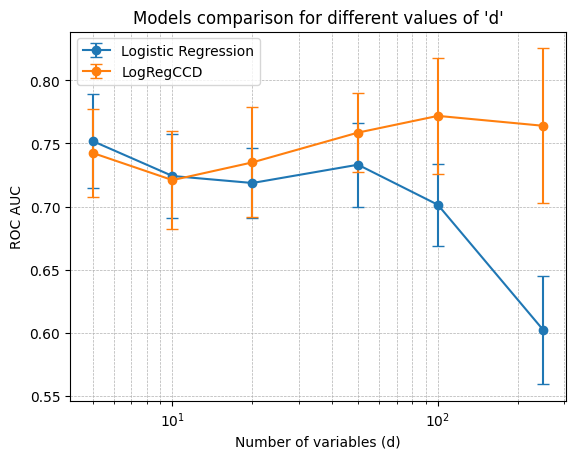

In [15]:
plt.errorbar(ds, lr_rocs, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ds, ccd_rocs, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)

plt.xlabel("Number of variables (d)")
plt.ylabel("ROC AUC")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'd'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

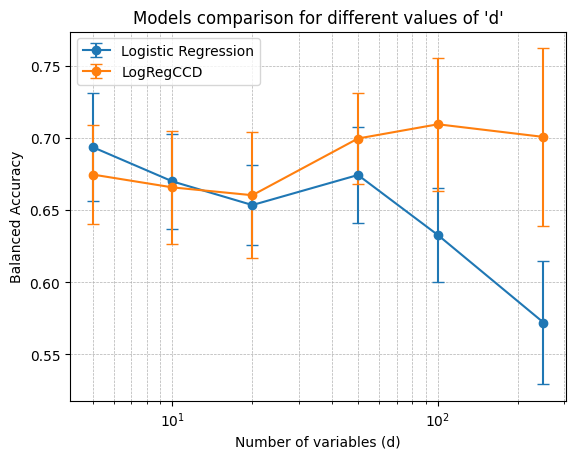

In [16]:
plt.errorbar(ds, lr_bas, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ds, ccd_bas, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)
plt.xlabel("Number of variables (d)")
plt.ylabel("Balanced Accuracy")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'd'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
## parameter p

In [21]:
ps = [0.1, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9]
g = 0.5
n = 500
d = 50
N = len(ps)

n_repeats = 5

lr_rocs = []
lr_bas = []
ccd_rocs = []
ccd_bas = []

lr_rocs_std = []
lr_bas_std = []
ccd_rocs_std = []
ccd_bas_std = []

for i, p in enumerate(ps):
    print(f"{i+1}/{N}: p = {p}")

    lr_roc_vals = []
    lr_ba_vals = []
    ccd_roc_vals = []
    ccd_ba_vals = []

    for _ in range(n_repeats):
        X, y = generate_dataset(n=n, p=p, g=g, d=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

        lr = LogisticRegression(penalty=None, random_state=23)
        lgccd = LogRegCCD(lambda_min=1e-3)
        _, best_lambda = lgccd.optimize_lambda(X_train, y_train, X_test, y_test, measure="f1", verbose=1)

        lr.fit(X_train, y_train)
        lr_y_probs = lr.predict_proba(X_test)[:,1]
        lr_preds = (lr_y_probs >= 0.5).astype(int)

        lr_roc_vals.append(roc_auc_score(y_test, lr_y_probs))
        lr_ba_vals.append(balanced_accuracy_score(y_test, lr_preds))

        lgccd.fit(X_train, y_train, best_lambda)
        ccd_roc_vals.append(lgccd.validate(X_test, y_test, measure='roc_auc'))
        ccd_ba_vals.append(lgccd.validate(X_test, y_test, measure='balanced_accuracy'))

    lr_rocs.append(np.mean(lr_roc_vals))
    lr_bas.append(np.mean(lr_ba_vals))
    ccd_rocs.append(np.mean(ccd_roc_vals))
    ccd_bas.append(np.mean(ccd_ba_vals))

    lr_rocs_std.append(np.std(lr_roc_vals))
    lr_bas_std.append(np.std(lr_ba_vals))
    ccd_rocs_std.append(np.std(ccd_roc_vals))
    ccd_bas_std.append(np.std(ccd_ba_vals))

1/7: p = 0.1


100%|██████████| 100/100 [00:09<00:00, 10.36it/s]


2/7: p = 0.2


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


3/7: p = 0.35


100%|██████████| 100/100 [00:09<00:00, 10.48it/s]


4/7: p = 0.5


100%|██████████| 100/100 [00:09<00:00, 10.39it/s]


5/7: p = 0.65


100%|██████████| 100/100 [00:09<00:00, 10.38it/s]


6/7: p = 0.8


100%|██████████| 100/100 [00:10<00:00,  9.40it/s]


7/7: p = 0.9


100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


In [22]:
data = {
    'p': ps,
    'lr_rocauc': lr_rocs,
    'lr_rocauc_std': lr_rocs_std,
    'lr_balancedaccuracy': lr_bas,
    'lr_balancedaccuracy_std': lr_bas_std,
    'ccd_rocauc': ccd_rocs,
    'ccd_rocauc_std': ccd_rocs_std,
    'ccd_balancedaccuracy': ccd_bas,
    'ccd_balancedaccuracy_std': ccd_bas_std
}

df = pd.DataFrame(data)
df.set_index('p', inplace=True)
print(df)

      lr_rocauc  lr_rocauc_std  lr_balancedaccuracy  lr_balancedaccuracy_std  \
p                                                                              
0.10   0.679517       0.057867             0.542370                 0.036408   
0.20   0.722155       0.036030             0.597884                 0.032365   
0.35   0.666558       0.070000             0.613012                 0.039966   
0.50   0.704046       0.028350             0.642174                 0.024050   
0.65   0.687808       0.029317             0.612938                 0.031751   
0.80   0.674735       0.060751             0.606494                 0.063477   
0.90   0.652411       0.069913             0.524073                 0.037049   

      ccd_rocauc  ccd_rocauc_std  ccd_balancedaccuracy  \
p                                                        
0.10    0.500000        0.000000              0.500000   
0.20    0.500000        0.000000              0.500000   
0.35    0.689528        0.076914              0

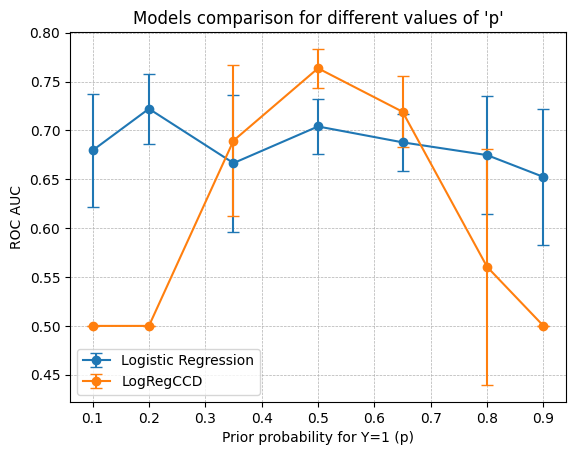

In [25]:
plt.errorbar(ps, lr_rocs, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ps, ccd_rocs, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)

plt.xlabel("Prior probability for Y=1 (p)")
plt.ylabel("ROC AUC")
plt.legend()
plt.title("Models comparison for different values of 'p'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

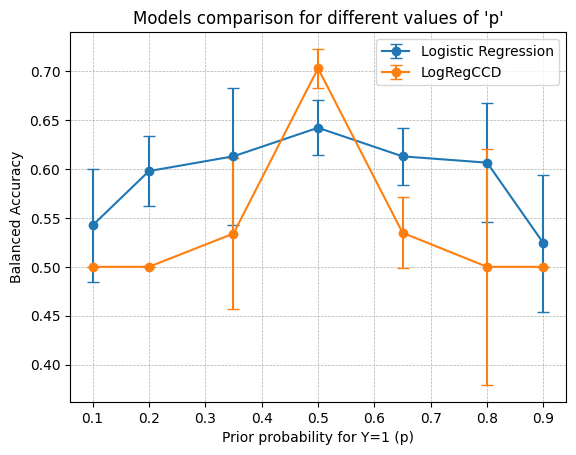

In [26]:
plt.errorbar(ps, lr_bas, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(ps, ccd_bas, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)
plt.xlabel("Prior probability for Y=1 (p)")
plt.ylabel("Balanced Accuracy")
plt.legend()
plt.title("Models comparison for different values of 'p'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
## parameter g

In [27]:
p = 0.5
gs = [0.1, 0.3, 0.5, 0.7, 0.9]
n = 500
d = 50
N = len(gs)

n_repeats = 5

lr_rocs = []
lr_bas = []
ccd_rocs = []
ccd_bas = []

lr_rocs_std = []
lr_bas_std = []
ccd_rocs_std = []
ccd_bas_std = []

for i, g in enumerate(gs):
    print(f"{i+1}/{N}: g = {g}")

    lr_roc_vals = []
    lr_ba_vals = []
    ccd_roc_vals = []
    ccd_ba_vals = []

    for _ in range(n_repeats):
        X, y = generate_dataset(n=n, p=p, g=g, d=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

        lr = LogisticRegression(penalty=None, random_state=23)
        lgccd = LogRegCCD(lambda_min=1e-3)
        _, best_lambda = lgccd.optimize_lambda(X_train, y_train, X_test, y_test, measure="f1", verbose=1)

        lr.fit(X_train, y_train)
        lr_y_probs = lr.predict_proba(X_test)[:,1]
        lr_preds = (lr_y_probs >= 0.5).astype(int)

        lr_roc_vals.append(roc_auc_score(y_test, lr_y_probs))
        lr_ba_vals.append(balanced_accuracy_score(y_test, lr_preds))

        lgccd.fit(X_train, y_train, best_lambda)
        ccd_roc_vals.append(lgccd.validate(X_test, y_test, measure='roc_auc'))
        ccd_ba_vals.append(lgccd.validate(X_test, y_test, measure='balanced_accuracy'))

    lr_rocs.append(np.mean(lr_roc_vals))
    lr_bas.append(np.mean(lr_ba_vals))
    ccd_rocs.append(np.mean(ccd_roc_vals))
    ccd_bas.append(np.mean(ccd_ba_vals))

    lr_rocs_std.append(np.std(lr_roc_vals))
    lr_bas_std.append(np.std(lr_ba_vals))
    ccd_rocs_std.append(np.std(ccd_roc_vals))
    ccd_bas_std.append(np.std(ccd_ba_vals))

1/5: g = 0.1


100%|██████████| 100/100 [00:10<00:00,  9.78it/s]


2/5: g = 0.3


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


3/5: g = 0.5


100%|██████████| 100/100 [00:09<00:00, 10.45it/s]


4/5: g = 0.7


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


5/5: g = 0.9


100%|██████████| 100/100 [00:09<00:00, 10.44it/s]


In [28]:
data = {
    'g': gs,
    'lr_rocauc': lr_rocs,
    'lr_rocauc_std': lr_rocs_std,
    'lr_balancedaccuracy': lr_bas,
    'lr_balancedaccuracy_std': lr_bas_std,
    'ccd_rocauc': ccd_rocs,
    'ccd_rocauc_std': ccd_rocs_std,
    'ccd_balancedaccuracy': ccd_bas,
    'ccd_balancedaccuracy_std': ccd_bas_std
}

df = pd.DataFrame(data)
df.set_index('g', inplace=True)
print(df)

     lr_rocauc  lr_rocauc_std  lr_balancedaccuracy  lr_balancedaccuracy_std  \
g                                                                             
0.1   0.727984       0.038485             0.656446                 0.050818   
0.3   0.691349       0.020076             0.642637                 0.017301   
0.5   0.718488       0.031257             0.648812                 0.046535   
0.7   0.706784       0.032487             0.654748                 0.028669   
0.9   0.802790       0.028778             0.730899                 0.042003   

     ccd_rocauc  ccd_rocauc_std  ccd_balancedaccuracy  \
g                                                       
0.1    0.762198        0.048624              0.701680   
0.3    0.746660        0.018494              0.711707   
0.5    0.773240        0.027391              0.708989   
0.7    0.717906        0.010065              0.655686   
0.9    0.773718        0.011556              0.702360   

     ccd_balancedaccuracy_std  
g             

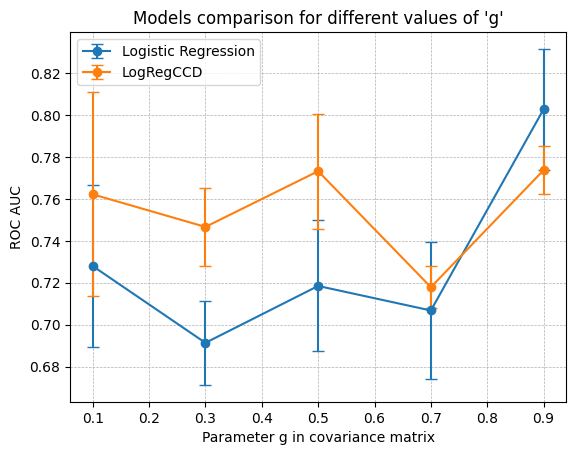

In [29]:
plt.errorbar(gs, lr_rocs, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(gs, ccd_rocs, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)

plt.xlabel("Parameter g in covariance matrix")
plt.ylabel("ROC AUC")
plt.legend()
plt.title("Models comparison for different values of 'g'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

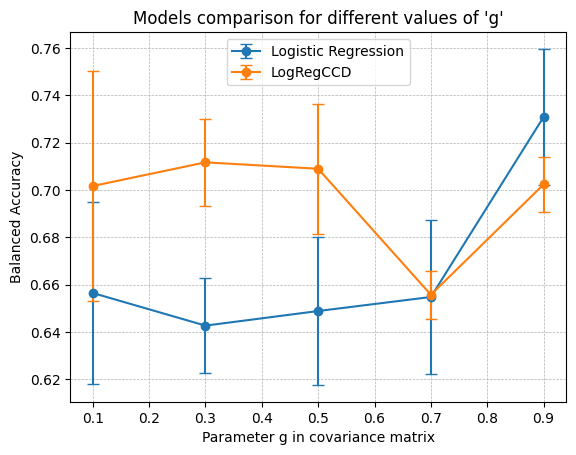

In [30]:
plt.errorbar(gs, lr_bas, yerr=lr_rocs_std, label="Logistic Regression", fmt='-o', capsize=4)
plt.errorbar(gs, ccd_bas, yerr=ccd_rocs_std, label="LogRegCCD", fmt='-o', capsize=4)
plt.xlabel("Parameter g in covariance matrix")
plt.ylabel("Balanced Accuracy")
plt.legend()
plt.title("Models comparison for different values of 'g'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
## big number of variables

In [ ]:
p = 0.5
g = 0.5
ns = [100, 200, 300, 500, 1000]
ds = [int(nn / 2) for nn in ns]
N = len(ns)

n_repeats = 5

lr_rocs = []
lr_bas = []
ccd_rocs = []
ccd_bas = []

for i, (n,d) in enumerate(zip(ns,ds)):
    print(f"{i+1}/{N}: n = {n}")

    lr_roc_vals = []
    lr_ba_vals = []
    ccd_roc_vals = []
    ccd_ba_vals = []

    for _ in range(n_repeats):
        X, y = generate_dataset(n=n, p=p, g=g, d=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

        lr = LogisticRegression(penalty=None, random_state=23)
        lgccd = LogRegCCD(lambda_min=1e-3)
        _, best_lambda = lgccd.optimize_lambda(X_train, y_train, X_test, y_test, measure="roc_auc", verbose=1)
        print(best_lambda)

        lr.fit(X_train, y_train)
        lr_y_probs = lr.predict_proba(X_test)[:,1]
        lr_preds = (lr_y_probs >= 0.5).astype(int)

        lr_roc_vals.append(roc_auc_score(y_test, lr_y_probs))
        lr_ba_vals.append(balanced_accuracy_score(y_test, lr_preds))

        lgccd.fit(X_train, y_train, best_lambda)
        ccd_roc_vals.append(lgccd.validate(X_test, y_test, measure='roc_auc'))
        ccd_ba_vals.append(lgccd.validate(X_test, y_test, measure='balanced_accuracy'))

    lr_rocs.append(np.mean(lr_roc_vals))
    lr_bas.append(np.mean(lr_ba_vals))
    ccd_rocs.append(np.mean(ccd_roc_vals))
    ccd_bas.append(np.mean(ccd_ba_vals))

1/8: n = 100


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


0.04328761281083057


100%|██████████| 100/100 [00:13<00:00,  7.24it/s]


0.24770763559917108


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]


0.10722672220103231


100%|██████████| 100/100 [00:14<00:00,  7.02it/s]


0.026560877829466867


100%|██████████| 100/100 [00:15<00:00,  6.66it/s]


0.11497569953977356
2/8: n = 200


100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


0.05722367659350217


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


0.2656087782946686


100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


0.0533669923120631


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


0.12328467394420659


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


0.1
3/8: n = 300


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


0.24770763559917108


100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


0.093260334688322


100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


0.08111308307896872


100%|██████████| 100/100 [01:15<00:00,  1.32it/s]


0.12328467394420659


100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


0.23101297000831597
4/8: n = 500


100%|██████████| 100/100 [03:05<00:00,  1.86s/it]


0.07564633275546287


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


0.05722367659350217


100%|██████████| 100/100 [03:12<00:00,  1.92s/it]


0.0657933224657568


100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


0.040370172585965536


100%|██████████| 100/100 [02:59<00:00,  1.80s/it]


0.2656087782946686
5/8: n = 1000


  0%|          | 0/100 [00:02<?, ?it/s]


KeyboardInterrupt: 

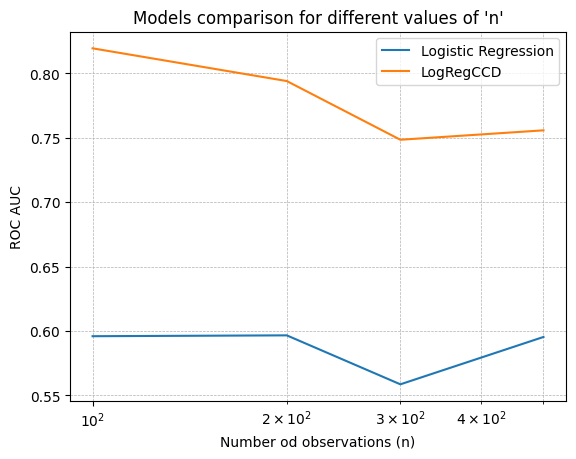

In [56]:
plt.plot(ns[:4], lr_rocs, label="Logistic Regression")
plt.plot(ns[:4], ccd_rocs, label="LogRegCCD")
plt.xlabel("Number od observations (n)")
plt.ylabel("ROC AUC")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'n'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

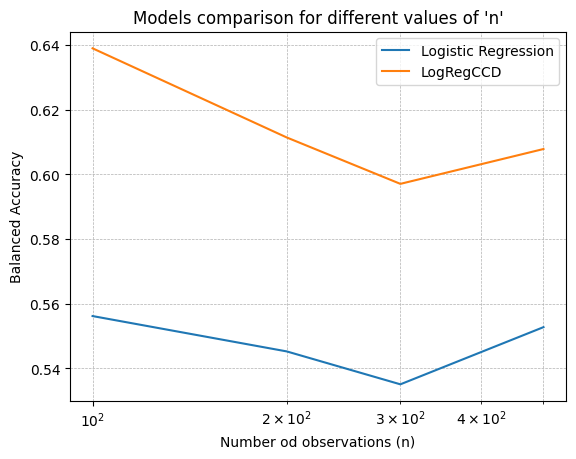

In [57]:
plt.plot(ns[:4], lr_bas, label="Logistic Regression")
plt.plot(ns[:4], ccd_bas, label="LogRegCCD")
plt.xlabel("Number od observations (n)")
plt.ylabel("Balanced Accuracy")
plt.xscale("log")
plt.legend()
plt.title("Models comparison for different values of 'n'")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()